In [6]:
import numpy as np
import pandas as pd
from results_v2 import *
from bronx.stdtypes.date import daterangex as rangex
import matplotlib.pyplot as plt
from matplotlib import colors

In [7]:
data_train_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_train/'
data_valid_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_test/'
data_test_location = '/cnrm/recyf/Data/users/danjoul/dataset/data_test/'
data_static_location = '/cnrm/recyf/Data/users/danjoul/dataset/'
baseline_location = '/cnrm/recyf/Data/users/danjoul/dataset/baseline/test/'

params = ['t2m']
static_fields = []
dates_train = rangex(['2020070100-2021053100-PT24H']) # à modifier
dates_valid = rangex(['2022020100-2022022800-PT24H', '2022040100-2022043000-PT24H', '2022060100-2022063000-PT24H']) # à modifier
dates_test = rangex(['2022030100-2022033100-PT24H', '2022050100-2022053100-PT24H']) # à modifier
resample = 'r'
param = 't2m'
echeances = range(6, 37, 3)
working_dir = '/cnrm/recyf/Data/users/danjoul/unet_experiments/unet_4/0.005_32_100/t2m/'

In [13]:
root_dir = '/cnrm/recyf/Data/users/danjoul/unet_experiments/unet_4/0.005_32_100/'
expes = pd.DataFrame(
    {'name' : ['t2m','SURFGEOPOTENTIEL', 'uv10', 'toa', 'cape'],
    'dir' : [
    root_dir + 't2m/',
    root_dir + 'SURFGEOPOTENTIEL/',
    root_dir + 'uv10/',
    root_dir + 'toa/',
    root_dir + 'cape/'        
    ]}
)
expes.head()


,name,dir
0,t2m,/cnrm/recyf/Data/users/danjoul/unet_experiment...
1,SURFGEOPOTENTIEL,/cnrm/recyf/Data/users/danjoul/unet_experiment...
2,uv10,/cnrm/recyf/Data/users/danjoul/unet_experiment...
3,toa,/cnrm/recyf/Data/users/danjoul/unet_experiment...
4,cape,/cnrm/recyf/Data/users/danjoul/unet_experiment...


missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00


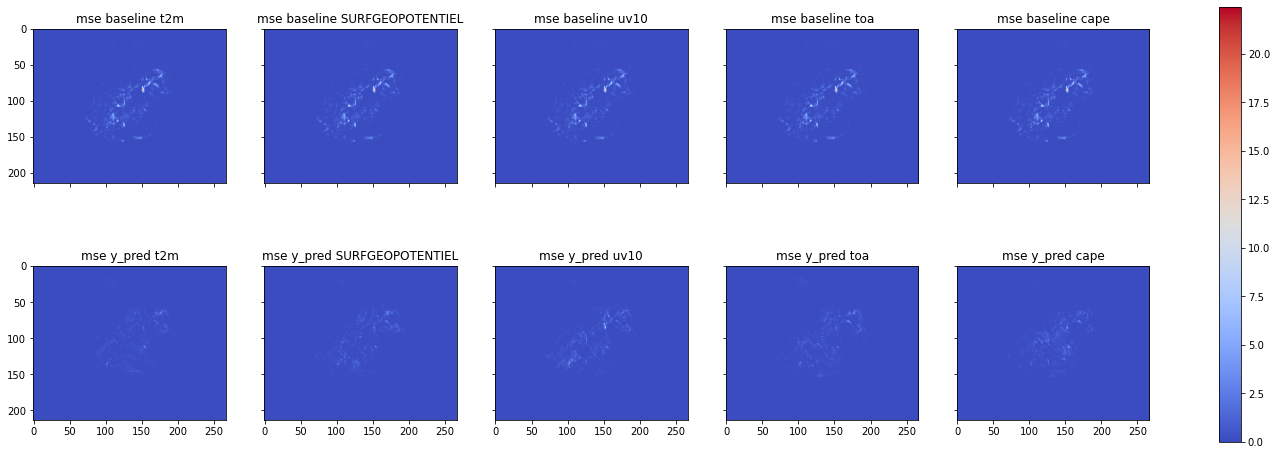

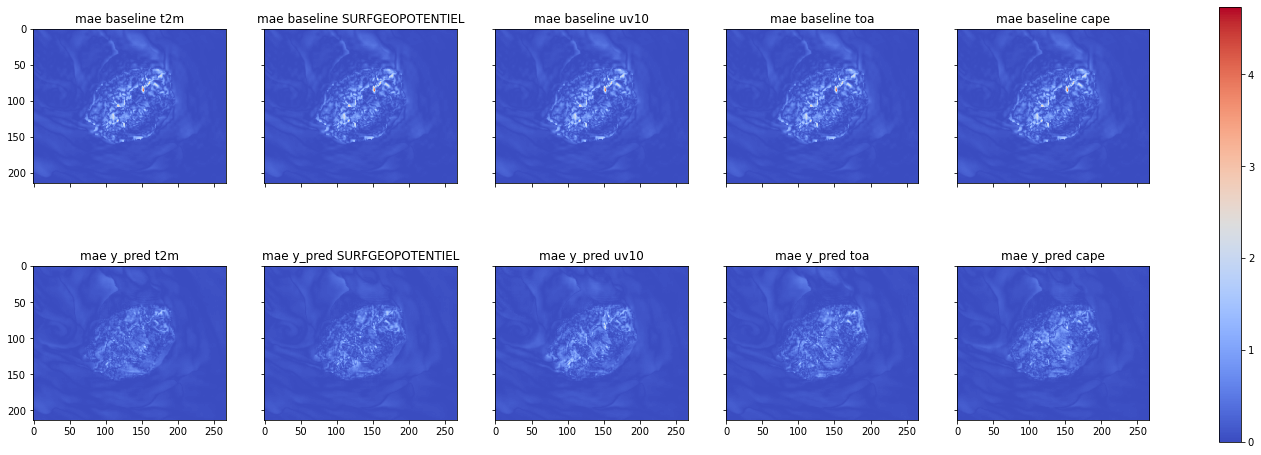

In [32]:
# plot score maps:
def synthesis_score_maps(expes, metric, metric_name, dates_test, echeances, resample, data_test_location, baseline_location, param='t2m'):
    for k in range(1):
        fig, axs = plt.subplots(nrows=2, ncols=len(expes), figsize=(5*len(expes), 8))
        images = []
        for j in range(len(expes)):
            working_dir = expes.dir[j]
            name = expes.name[j]
            results_df = load_data(working_dir, dates_test, echeances, resample, data_test_location, baseline_location, param=param)
            metric_df  = get_scores(results_df, metric, metric_name)
            data = [metric_df[metric_name + '_baseline_map'][k], metric_df[metric_name + '_y_pred_map'][k]]
            for i in range(len(data)):
                im = axs[i, j].imshow(data[i], cmap='coolwarm')
                images.append(im)
                axs[i, j].label_outer()
            axs[0, j].set_title(metric_name + ' baseline ' + name)
            axs[1, j].set_title(metric_name + ' y_pred ' + name)

        vmin = min(image.get_array().min() for image in images)
        vmax = max(image.get_array().max() for image in images)
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        for im in images:
            im.set_norm(norm)
        fig.colorbar(images[0], ax=axs)
        # plt.savefig(output_dir + metric_name + str(k) + '_map.png')

synthesis_score_maps(expes, mse, 'mse', dates_test, echeances, resample, data_test_location, baseline_location, param)
synthesis_score_maps(expes, mae, 'mae', dates_test, echeances, resample, data_test_location, baseline_location, param)

missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00
missing day : 2022-05-24T00:00:00


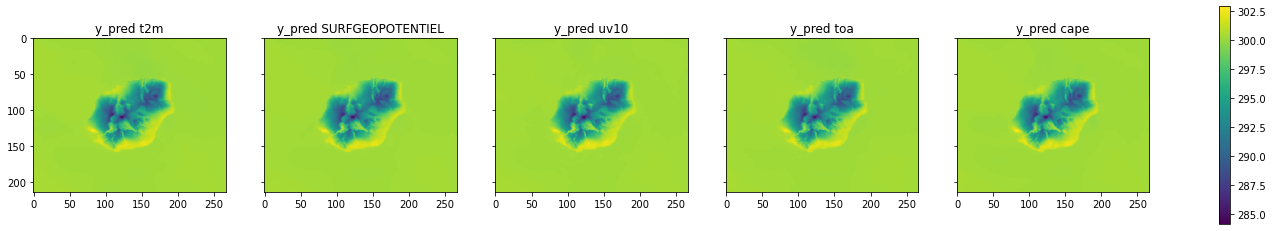

In [31]:
# plot maps:
def synthesis_score_maps(expes, dates_test, echeances, resample, data_test_location, baseline_location, param='t2m', full=False):
    for k in range(1):
        if full:
            fig, axs = plt.subplots(nrows=4, ncols=len(expes), figsize=(5*len(expes), 16))
            images = []
            for j in range(len(expes)):
                working_dir = expes.dir[j]
                name = expes.name[j]
                results_df = load_data(working_dir, dates_test, echeances, resample, data_test_location, baseline_location, param=param)
                data = [results_df.X_test[k], results_df.baseline[k], results_df.y_pred[k], results_df.y_test[k]]
                for i in range(len(data)):
                    im = axs[i, j].imshow(data[i], cmap='viridis')
                    images.append(im)
                    axs[i, j].label_outer()
                axs[0, j].set_title('X_test ' + name)
                axs[1, j].set_title('baseline ' + name)
                axs[2, j].set_title('y_pred ' + name)
                axs[3, j].set_title('y_test ' + name)

            vmin = min(image.get_array().min() for image in images)
            vmax = max(image.get_array().max() for image in images)
            norm = colors.Normalize(vmin=vmin, vmax=vmax)
            for im in images:
                im.set_norm(norm)
            fig.colorbar(images[0], ax=axs)
            # plt.savefig(output_dir + 'synthesis_' + str(k) + '_map.png')
        else:
            fig, axs = plt.subplots(nrows=1, ncols=len(expes), figsize=(5*len(expes), 4))
            images = []
            for j in range(len(expes)):
                working_dir = expes.dir[j]
                name = expes.name[j]
                results_df = load_data(working_dir, dates_test, echeances, resample, data_test_location, baseline_location, param=param)
                im = axs[j].imshow(results_df.y_pred[k], cmap='viridis')
                images.append(im)
                axs[j].label_outer()
                axs[j].set_title('y_pred ' + name)

            vmin = min(image.get_array().min() for image in images)
            vmax = max(image.get_array().max() for image in images)
            norm = colors.Normalize(vmin=vmin, vmax=vmax)
            for im in images:
                im.set_norm(norm)
            fig.colorbar(images[0], ax=axs)
            # plt.savefig(output_dir + 'synthesis_' + str(k) + '_map.png')

synthesis_score_maps(expes, dates_test, echeances, resample, data_test_location, baseline_location, param)

In [ ]:
# boxplots
